In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
with open("./zip3_del_endrandratio_num-real-5000_ext-110000)_chrends.txt", "r") as f:
    data = [float(row.strip("\n")) for row in f]

with open("./zip3_del_enddata_ext-110000_chrends.txt", "r") as f:
    cen_ratio = [float(row.strip("ratio:\t")) for row in f if row.startswith("ratio")]

In [36]:
print(cen_ratio)

[1.0285015013534395]


In [37]:
print(data)

[1.031521668296116, 1.0517324318076757, 1.0334027169453748, 1.0653848808151891, 1.0173154474657358, 1.0380036829213093, 1.0275265019084505, 1.0271593112925177, 0.9849514760665685, 1.0000190978038623, 0.9858608909996647, 1.0582268745600185, 0.9801979483555999, 1.0272915944149883, 1.0163954286464754, 1.0086061356760827, 1.0187746197022574, 0.9831742712805797, 0.9830529003609021, 1.0299792350862775, 0.9635689450715532, 1.0456972661937118, 0.9890261103741593, 0.9619185694586945, 1.027465686732646, 1.0153505319331473, 1.040162451086842, 1.0164481928525968, 0.9710305836591604, 1.0906019428448746, 1.0361450157485532, 1.05863921268481, 1.024530619825799, 1.0014544645129286, 1.0068477631162867, 0.9990007447797512, 1.0287848902506325, 1.0087117865718702, 0.9776193023555468, 1.0383933566388523, 1.01019836397534, 1.0106129029117255, 1.001739740092155, 1.0424256978859794, 0.9734286178427023, 1.0043074321462147, 0.9533628414033684, 1.0162494664762407, 0.9991177075935347, 1.013156955829775, 1.0390608

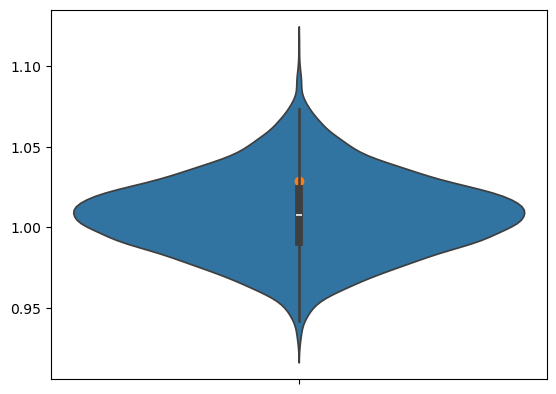

In [38]:
sns.violinplot(data)
plt.scatter(y = cen_ratio[0], x = 0)